## Green Belt - Lista de Exercícios 2  
### Gráfico de Controle e Capabilidade

1 - Uma empresa acompanha o seu volume financeiro em estoque para avaliar se o 
departamento de Planejamento e Controle da Produção está fazendo corretamente o seu 
trabalho. Todo mês, um inventário é realizado e o valor total do estoque é anotado. A empresa 
quer saber se, em algum dos meses, o volume financeiro de estoque foi maior ou menor do que 
ele costuma ser, pois o Gerente de PCP diz que está fazendo vários projetos para a redução do 
valor em estoque.  

Baseado neste cenário, temos que entender se o valor de estoque está sob controle estatístico, 
indicando um processo estável. Caso ele esteja, significa que as medidas tomadas pelo gerente 
não estão surtindo efeito. A ferramenta que nos dará esta resposta é o Gráfico de Controle do 
valor inventariado. 

Os dados estão na planilha Green_Belt_FM2S_Lista_Exercícios_02, na aba 
01.Estoque.

### Importação dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/2-Measure/Exercicios/Lista_2/base_dados/Estoque.csv'
df = pd.read_csv(url)

df.head()

,Mês,Inventário
0,jan./2003,19
1,fev./2003,27
2,mar./2003,20
3,abr./2003,16
4,mai./2003,18


### Responda:

a) Qual tipo de variável é o valor (medido em milhares de reais)? É uma variável de 
contagem, classificação ou contínua? 

R: O valor do inventário (em milhares de reais) é uma variável contínua, pois pode assumir qualquer valor dentro de um intervalo (ex: R$ 19.500, R$ 27.200, etc.).

b) Como o dado foi coletado e é apresentado? Qual é o eixo X do gráfico de controle? 
Quantas medidas de valor temos por unidade de tempo (em outras palavras, qual é o 
tamanho do subgrupo?) 

In [2]:
print(f"Número de medições: {len(df)}")
print(f"Subgrupos: {df['Mês'].nunique()} (1 medição/mês)")

Número de medições: 31
Subgrupos: 31 (1 medição/mês)


c) Qual é o gráfico de controle mais adequado para analisar estes dados?

R: Como temos dados contínuos com subgrupos de tamanho 1, o gráfico recomendado é a Carta I-MR (Individual-Moving Range).

d) Lembre-se que o gráfico de controle só pode ser usado se os dados obtidos puderem 
ser aproximados por distribuições específicas (Normal para dados contínuos, Poisson 
para dados de contagem e Binomial para dados categóricos). Avalie se a variável “valor” 
é aproximável por uma distribuição normal.

R: Podemos usar o teste de Shapiro-Wilk e um histograma:

Valor-p: 0.0562
Normal
Estatística do teste: 0.9339
Valor médio do inventário: 20.39 mil reais


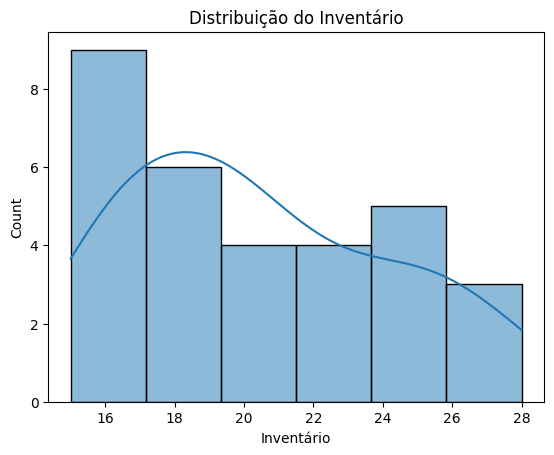

In [3]:
from scipy.stats import shapiro

# Teste de normalidade
stat, p_valor = shapiro(df['Inventário'])
print(f"Valor-p: {p_valor:.4f}")
print("Normal" if p_valor > 0.05 else "Não normal")
print(f"Estatística do teste: {stat:.4f}")
print(f"Valor médio do inventário: {df['Inventário'].mean():.2f} mil reais")

# Histograma
sns.histplot(df['Inventário'], kde=True)
plt.title("Distribuição do Inventário")
plt.show()

e) Trace o gráfico de controle mais adequado. Os gráficos de controle ficam na aba “Estat 
→ Cartas de Controle” do Minitab. O gráfico de Individuais encontra-se no submenu 
“Cartas de Variáveis para Dados Individuais”, os gráficos P e U encontram-se no 
submenu “Cartas de Atributos” e o gráfico X-Barra S encontra-se no submenu “Cartas 
de Variáveis para Subgrupos”. Lembre-se de escolher a variável correta para plotar e de 
ajustar a escala! 

R: Como não temos subgrupos, usamos a Carta de Individuais (I) e a Amplitude Móvel (MR):

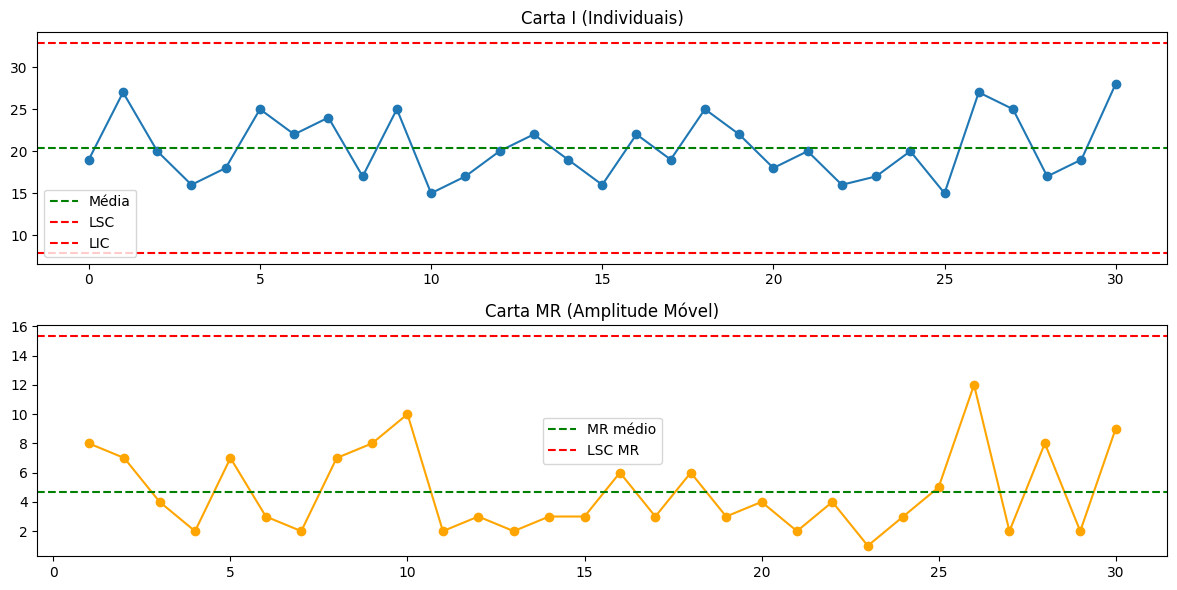

In [4]:
def carta_controle_I_MR(dados, coluna):
    # Cálculo dos limites
    media = dados[coluna].mean()
    mr = np.abs(dados[coluna].diff().dropna())
    amr = mr.mean()
    lsc_i = media + 2.66 * amr
    lic_i = media - 2.66 * amr
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(dados[coluna], marker='o')
    plt.axhline(media, color='g', linestyle='--', label='Média')
    plt.axhline(lsc_i, color='r', linestyle='--', label='LSC')
    plt.axhline(lic_i, color='r', linestyle='--', label='LIC')
    plt.title("Carta I (Individuais)")
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(mr, marker='o', color='orange')
    plt.axhline(amr, color='g', linestyle='--', label='MR médio')
    plt.axhline(3.27 * amr, color='r', linestyle='--', label='LSC MR')
    plt.title("Carta MR (Amplitude Móvel)")
    plt.legend()
    plt.tight_layout()
    plt.show()

carta_controle_I_MR(df, 'Inventário')

f) Analise o gráfico. Existem causas especiais? 

Regra 1: Pontos fora dos limites (LIC/LSC).

Regra 2: Tendências ou padrões não aleatórios.

No gráfico gerado, verifique se há pontos fora dos limites vermelhos ou sequências acima/abaixo da média

g) O que pode ser dito das ações do Gerente?

R: Se o processo estiver sob controle estatístico (sem causas especiais), as ações do gerente não estão impactando significativamente o estoque. Se houver causas especiais, pode indicar efeito de intervenções.

h) Você sabia que existe outro caminho para fazer este gráfico? Vá em “Assistente” e 
selecione a opção “Cartas de Controle…”. Use a árvore (você pode clicar nos pontos de 
decisão se precisar de ajuda) para selecionar o gráfico. Use o formato proposto. Trace 
novamente o gráfico.

R: O "Assistente" do Minitab guia a escolha do gráfico com base nas características dos dados. Em Python, usamos a função carta_controle_I_MR acima para replicar a lógica.

i) Analise cuidadosamente cada tela. O que cada uma diz? 

R:

1. Seleção de Dados: Escolha da coluna Inventário.

2. Tipo de Gráfico: Carta I-MR automática.

3. Limites: Calculados com base na amplitude móvel (2.66 * AMR).

4. Testes Especiais: Verificação de violações de regras (ex: 8 pontos consecutivos acima da média).